<img src="http://imgur.com/1ZcRyrc.png" style="float: right; margin: 20px; height: 55px">
<img src="https://seeklogo.com/images/M/misk-academy-logo-77B2EA3795-seeklogo.com.png" style="float: right; margin: 20px; height: 55px">

# Airbnb Exploratory Data Analysis 

##### Done by: <span style='color:#8B1919'> Nuha Alrashed </span>
##### Email: nuha.alraashed@gmail.com
##### Date:  <span style='color:#8B1919'> 20th April, 2021 </span>
---
##### Dataset resourse: 
<span style='color:#8B1919'> **Amsterdam, North Holland, The Netherlands** </span>
##### Data set link: 
http://insideairbnb.com/get-the-data.html

---

### <span style='color:#8B1919' > ***Libraries*** </span> 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

---

### <span style='color:#8B1919' > ***Files*** </span> 

In [2]:
df = pd.read_csv('listings.csv')

---

## <span style='color:#8B1919' > ***Exploring Airbnb Dataset*** </span> 

In [3]:
# First, we want to use Shape method to determine the amount of total rows and total columns in the dataset

print(f"There are {df.shape[0]} rows and {df.shape[1]} columns within the file")

There are 18291 rows and 16 columns within the file


In [8]:
# we want to see the first 3 rows of Airbnb dataset using head method
df.head(3)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2818,Quiet Garden View Room & Super Fast WiFi,3159,Daniel,NaN,Oostelijk Havengebied - Indische Buurt,52.36575,4.94142,Private room,59,3,278,2020-02-14,1.92,1,139
1,20168,Studio with private bathroom in the centre 1,59484,Alexander,NaN,Centrum-Oost,52.36509,4.89354,Private room,129,1,339,2020-04-09,2.54,2,0
2,25428,"Lovely, spacious 1 bed apt in Center(with lift)",56142,Joan,NaN,Centrum-West,52.37297,4.88339,Entire home/apt,125,14,5,2020-02-09,0.13,1,251


In [13]:
# By using a loop we can display Airbnb dataset columns and data types

for columns in df:
    print(columns, df.dtypes)
    # 'break' is used to stop the loop at the end of 1 cycle, we do not need the same data duplicated 16 times
    break

id id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group               float64
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object


In [19]:
# We also want to calculate some numbers for the columns: price, minimum_nights, number_of_reviews, and reviews_per_month.

df[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month']].describe()

,price,minimum_nights,number_of_reviews,reviews_per_month
count,18291.000000,18291.000000,18291.000000,15902.000000
mean,153.055984,3.727407,24.125198,0.591448
std,163.034869,16.331468,54.560889,1.065085
min,0.000000,1.000000,0.000000,0.010000
25%,95.000000,2.000000,2.000000,0.130000
50%,128.000000,2.000000,8.000000,0.280000
75%,180.000000,3.000000,22.000000,0.580000
max,8000.000000,1001.000000,859.000000,35.530000


---


## <span style='color:#8B1919' > ***Cleaning the Airbnb Dataset*** </span> 

In [4]:
# Let's first drop the duplicates data from our dataset:

df.drop_duplicates()

# As shown in the output; the number of rows is still the same (18,291)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2818,Quiet Garden View Room & Super Fast WiFi,3159,Daniel,NaN,Oostelijk Havengebied - Indische Buurt,52.36575,4.94142,Private room,59,3,278,2020-02-14,1.92,1,139
1,20168,Studio with private bathroom in the centre 1,59484,Alexander,NaN,Centrum-Oost,52.36509,4.89354,Private room,129,1,339,2020-04-09,2.54,2,0
2,25428,"Lovely, spacious 1 bed apt in Center(with lift)",56142,Joan,NaN,Centrum-West,52.37297,4.88339,Entire home/apt,125,14,5,2020-02-09,0.13,1,251
3,27886,"Romantic, stylish B&B houseboat in canal district",97647,Flip,NaN,Centrum-West,52.38761,4.89188,Private room,125,2,219,2020-07-25,1.98,1,136
4,28871,Comfortable double room,124245,Edwin,NaN,Centrum-Oost,52.36610,4.88953,Private room,75,2,336,2020-09-20,2.63,2,338
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18286,48052590,Studio in hartje Jordaan,386988640,Danny,NaN,Centrum-West,52.37768,4.87886,Private room,120,1,0,NaN,NaN,1,86
18287,48062763,Ruime kamer Hoofddorppleinbuurt vlak bij centrum,34185178,Rob,NaN,Zuid,52.35062,4.85184,Private room,32,1,0,NaN,NaN,1,129
18288,48065391,Canal house,39311596,Remco,NaN,Centrum-Oost,52.36058,4.90346,Entire home/apt,250,4,0,NaN,NaN,1,82
18289,48066023,Amsterdam style house with giant roof terrace,50268303,Nicolai,NaN,De Pijp - Rivierenbuurt,52.35551,4.90148,Entire home/apt,55,2,0,NaN,NaN,1,48


In [5]:
# Now let's see if there is any missing data
df.isnull().sum()

# we have 5 columns which contain nulls: 'name' ,'host_name', 'neighbourhood_group' and 'last_review'

id                                    0
name                                 33
host_id                               0
host_name                            63
neighbourhood_group               18291
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                        2389
reviews_per_month                  2389
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [6]:
# Filling 'name' ,'host_name' and 'neighbourhood_group' with Unknown and 'last_review' with Date unavailable
df.fillna({'name':'Unknown', 'host_name':'Unknown', 'neighbourhood_group':'Unknown', 'last_review':'Date unavailable'})

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2818,Quiet Garden View Room & Super Fast WiFi,3159,Daniel,Unknown,Oostelijk Havengebied - Indische Buurt,52.36575,4.94142,Private room,59,3,278,2020-02-14,1.92,1,139
1,20168,Studio with private bathroom in the centre 1,59484,Alexander,Unknown,Centrum-Oost,52.36509,4.89354,Private room,129,1,339,2020-04-09,2.54,2,0
2,25428,"Lovely, spacious 1 bed apt in Center(with lift)",56142,Joan,Unknown,Centrum-West,52.37297,4.88339,Entire home/apt,125,14,5,2020-02-09,0.13,1,251
3,27886,"Romantic, stylish B&B houseboat in canal district",97647,Flip,Unknown,Centrum-West,52.38761,4.89188,Private room,125,2,219,2020-07-25,1.98,1,136
4,28871,Comfortable double room,124245,Edwin,Unknown,Centrum-Oost,52.36610,4.88953,Private room,75,2,336,2020-09-20,2.63,2,338
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18286,48052590,Studio in hartje Jordaan,386988640,Danny,Unknown,Centrum-West,52.37768,4.87886,Private room,120,1,0,Date unavailable,NaN,1,86
18287,48062763,Ruime kamer Hoofddorppleinbuurt vlak bij centrum,34185178,Rob,Unknown,Zuid,52.35062,4.85184,Private room,32,1,0,Date unavailable,NaN,1,129
18288,48065391,Canal house,39311596,Remco,Unknown,Centrum-Oost,52.36058,4.90346,Entire home/apt,250,4,0,Date unavailable,NaN,1,82
18289,48066023,Amsterdam style house with giant roof terrace,50268303,Nicolai,Unknown,De Pijp - Rivierenbuurt,52.35551,4.90148,Entire home/apt,55,2,0,Date unavailable,NaN,1,48


In [9]:
# Filling 'reviews_per_month' with the mean (average) of the column
df['reviews_per_month'].fillna(df.reviews_per_month.mean())

0        1.920000
1        2.540000
2        0.130000
3        1.980000
4        2.630000
           ...   
18286    0.591448
18287    0.591448
18288    0.591448
18289    0.591448
18290    0.591448
Name: reviews_per_month, Length: 18291, dtype: float64

In [48]:
# We can create a new column to rank the prices between low, mid, and high. 

def price_rank(df):
    if df['price'] <= 80:
        # if price is less than or equal to 80, then the price is low
        return 'Low'
    elif df['price'] > 80 and df['price'] < 200:
        # if price is greater than 80 and less than 200, then the price is mid
        return 'Mid'
    else:
        # if price is greater or equal to 200, then the price is high
        return 'High'

df['price_rank'] = df.apply(price_rank, axis=1)
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,price_rank
0,2818,Quiet Garden View Room & Super Fast WiFi,3159,Daniel,NaN,Oostelijk Havengebied - Indische Buurt,52.36575,4.94142,Private room,59,3,278,2020-02-14,1.92,1,139,Low
1,20168,Studio with private bathroom in the centre 1,59484,Alexander,NaN,Centrum-Oost,52.36509,4.89354,Private room,129,1,339,2020-04-09,2.54,2,0,Mid
2,25428,"Lovely, spacious 1 bed apt in Center(with lift)",56142,Joan,NaN,Centrum-West,52.37297,4.88339,Entire home/apt,125,14,5,2020-02-09,0.13,1,251,Mid
3,27886,"Romantic, stylish B&B houseboat in canal district",97647,Flip,NaN,Centrum-West,52.38761,4.89188,Private room,125,2,219,2020-07-25,1.98,1,136,Mid
4,28871,Comfortable double room,124245,Edwin,NaN,Centrum-Oost,52.36610,4.88953,Private room,75,2,336,2020-09-20,2.63,2,338,Low


---


## <span style='color:#8B1919' > ***Visualizing Airbnb Dataset*** </span> 

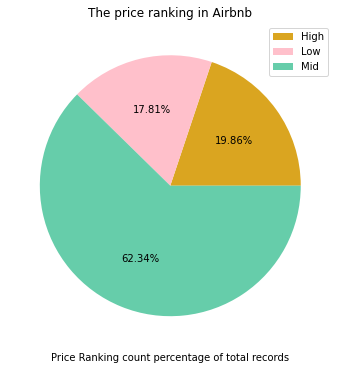

In [83]:
# First: we will visualize a pie chart to see the percentage of each 'price ranking' in our dataset

# by assigning 'autopct' which is used to display the percentage value. 
# setting colors, and removing lables.
df.groupby('price_rank').size().plot.pie(autopct = "%.2f%%", colors = ['#DAA520', 'pink', '#66CDAA'], labeldistance=None)

# Set a title for the graph
plt.title('The price ranking in Airbnb')

# Assign labels
plt.xlabel('Price Ranking count percentage of total rooms')
plt.ylabel(None)

# Setting legends to clarify the chart
plt.legend(loc="upper right")

# Resize the figure
plt.rcParams["figure.figsize"] = (9,6)

As shown in the figure above: 
- Medium price ranking has 62.34% of total rooms.
- Both Low and High price rankings have almost the same percentage.

---

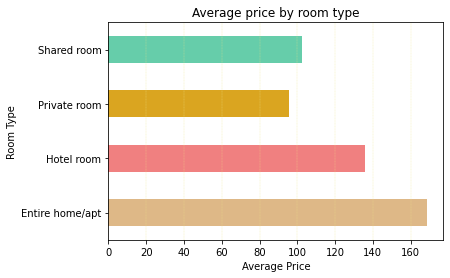

In [44]:
# Second: Visualizing a horizontal bar chart for average prices by room type

# and assign a color for each room type. 
df.groupby('room_type')['price'].mean().plot(kind='barh',  color=['#DEB887', '#F08080', '#DAA520', '#66CDAA'])

# Set a title for the graph
plt.title('Average price by room type')

# Assign labels
plt.ylabel('Room Type')
plt.xlabel('Average Price')

# add and customize grid lines
plt.grid(axis = 'x', color = '#F0E68C', linestyle = '--', linewidth = 0.3)

# resize the figure
plt.rcParams["figure.figsize"] = (9,6)

plt.show()

As shown in the figure above:

- Average prices for 'Entire home/apartment' is the highest, and 'Private room' is the lowest.
- 'Shared rooms' and 'Private rooms' have a small gap between average prices.